In [1]:
#Code as per youtube 
import pandas as pd
ds=pd.DataFrame({"size":['s','m','l','xl','s','m','xl']})

In [2]:
order_ds=[['s','m','l','xl']]


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Odinal data transformer
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=order_ds)

In [5]:
oe.fit_transform(ds)

array([[0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [1.],
       [3.]])

In [6]:
#using map()
size_map={'s':0,'m':1,'l':3,'xl':4}
ds['new_ds']=ds['size'].map(size_map)
ds

,size,new_ds
0,s,0
1,m,1
2,l,3
3,xl,4
4,s,0
5,m,1
6,xl,4


In [7]:
#Outlier Detection
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r'C:\DataScience-GenerativeAI-AgenticAI\Practical\DS-GenAi-AgenticAI-Bootcamp\6-month-AI-Roadmap_2025\6. Shared\loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [8]:
df[['ApplicantIncome','CoapplicantIncome']].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
dtype: int64

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


<Axes: >

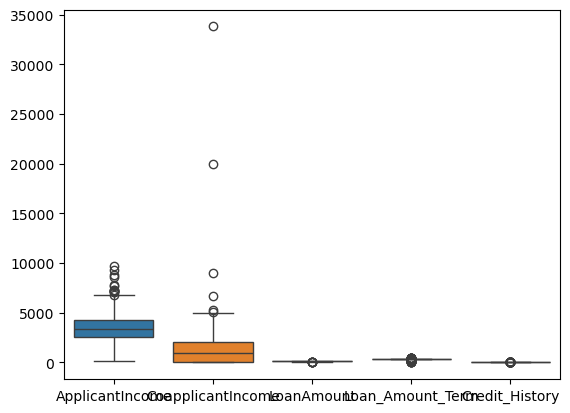

In [10]:
sns.boxplot(data=df)

C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\1382451083.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


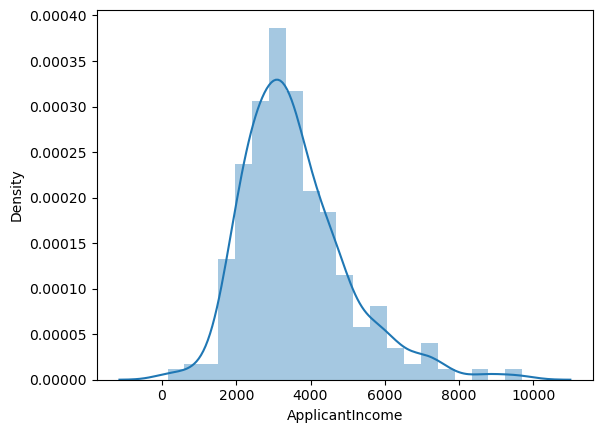

In [11]:
sns.distplot(df['ApplicantIncome'])
plt.show()
#Long tail as more outliers

In [12]:
df.shape

(381, 13)

In [13]:
q1=df['CoapplicantIncome'].quantile(0.25)  
q3=df['CoapplicantIncome'].quantile(0.75)  
print(q1,'-',q3)

0.0 - 2016.0


In [14]:
IQR=q3-q1
IQR

np.float64(2016.0)

In [15]:
min=q1-(1.5*IQR)
max=q1+(1.5*IQR)
min,max


(np.float64(-3024.0), np.float64(3024.0))

In [16]:
#we goign to consider max value as min contain -
df_new=df[df['CoapplicantIncome']<=max]
df_new.shape

(353, 13)

In [17]:
df_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


<Axes: xlabel='CoapplicantIncome'>

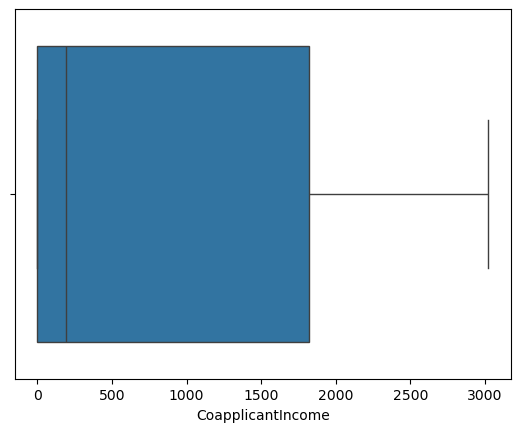

In [18]:
sns.boxplot(data=df_new,x='CoapplicantIncome')

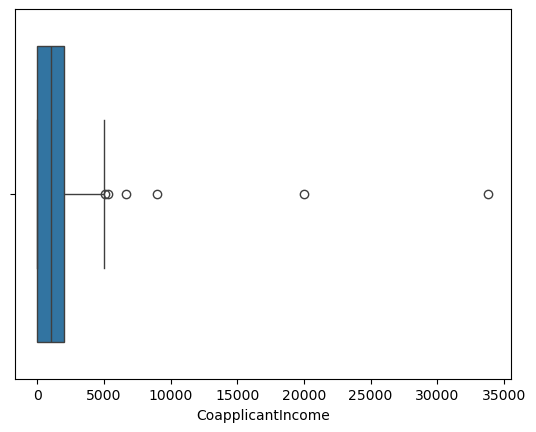

In [19]:
#Outlier detection using Z-score
sns.boxplot(data=df,x='CoapplicantIncome')
plt.show()

C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


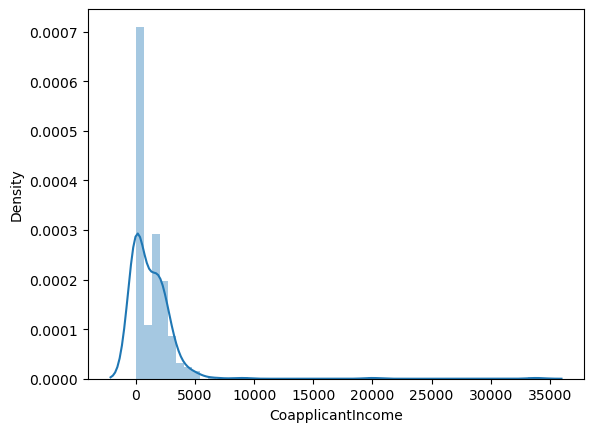

In [20]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [21]:
#z_score=df['CoapplicantIncome'].sc
Z_score=(df['CoapplicantIncome']-df['CoapplicantIncome'].mean())/df['CoapplicantIncome'].std()
# df_new_Z=df[df['CoapplicantIncome']<3]
# df_new_Z.shape

In [22]:
#appnd z_score column and then do condictional check
df['z_score']=Z_score

In [23]:
df[df['z_score']<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.098566
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.545653
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.461687
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.545653
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0.101983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,-0.545653
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,0.287389
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.545653
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.545653


In [24]:
##Standarization (Standard Scaling)
df['ApplicantIncome'].isnull().sum()


np.int64(0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df[['ApplicantIncome']])
df['ApplicantIncome_ss']=pd.DataFrame(sc.transform(df[['ApplicantIncome']]))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score,ApplicantIncome_ss
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.098566,0.707469
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.545653,-0.408932
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.461687,-0.703019
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.545653,1.706799
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0.101983,-0.879330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,-0.545653,1.497342
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,0.287389,-0.245316
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.545653,-0.479457
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.545653,0.371067


In [26]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,z_score,ApplicantIncome_ss
count,381.000000,381.000000,381.000000,370.000000,351.000000,3.810000e+02,3.810000e+02
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607,1.165588e-17,1.282147e-16
std,1419.813818,2340.818114,28.358464,68.549257,0.369338,1.000000e+00,1.001315e+00
min,150.000000,0.000000,9.000000,12.000000,0.000000,-5.456534e-01,-2.418877e+00
25%,2600.000000,0.000000,90.000000,360.000000,1.000000,-5.456534e-01,-6.910297e-01
50%,3333.000000,983.000000,110.000000,360.000000,1.000000,-1.257148e-01,-1.740860e-01
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000,3.155839e-01,4.994218e-01
max,9703.000000,33837.000000,150.000000,480.000000,1.000000,1.390955e+01,4.318317e+00


C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\3385199946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


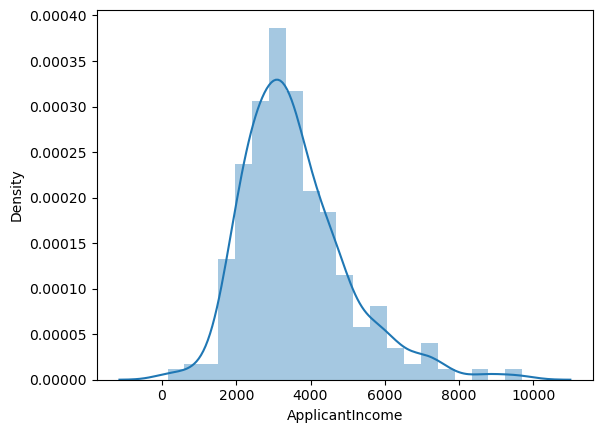

In [27]:
sns.distplot(df['ApplicantIncome'])
plt.show()

C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\2193797349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome_ss'])


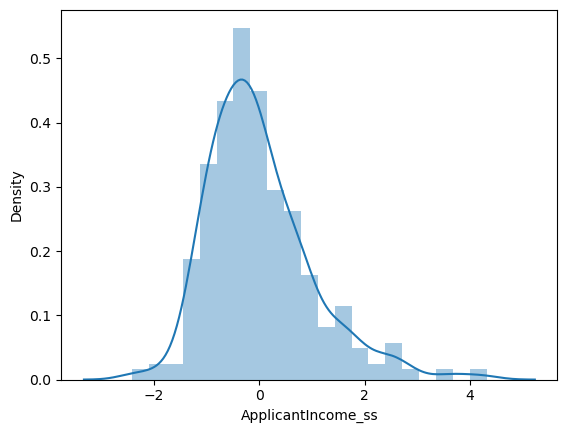

In [28]:
sns.distplot(df['ApplicantIncome_ss'])
plt.show()

In [29]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
min_max.fit(df[['ApplicantIncome']])
df[['ApplicantIncome_min_max']]=min_max.transform(df[['ApplicantIncome']])

In [30]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score,ApplicantIncome_ss,ApplicantIncome_min_max
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.098566,0.707469,0.464043
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.545653,-0.408932,0.298336
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.461687,-0.703019,0.254684
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.545653,1.706799,0.612373
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0.101983,-0.879330,0.228515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,-0.545653,1.497342,0.581283
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,0.287389,-0.245316,0.322621
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.545653,-0.479457,0.287868
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.545653,0.371067,0.414111


C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\1981227247.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])
C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\1981227247.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome_min_max'])


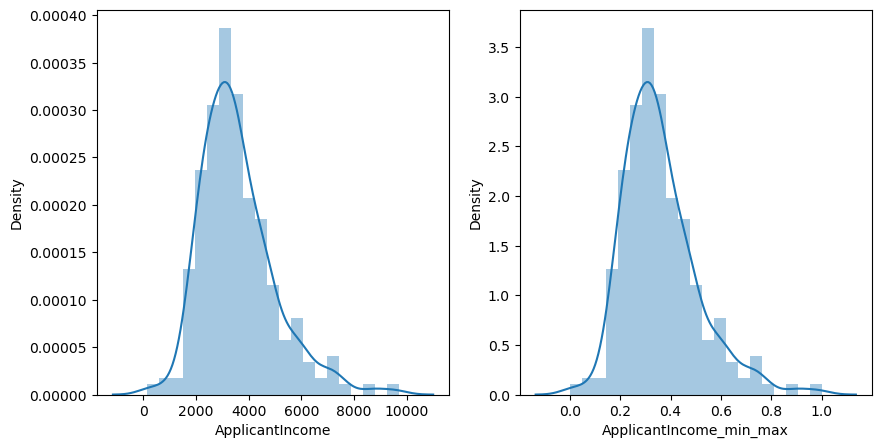

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'])
plt.subplot(1,2,2)
sns.distplot(df['ApplicantIncome_min_max'])
plt.show()

In [32]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score,ApplicantIncome_ss,ApplicantIncome_min_max
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.098566,0.707469,0.464043
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.545653,-0.408932,0.298336
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.461687,-0.703019,0.254684
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.545653,1.706799,0.612373
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0.101983,-0.879330,0.228515


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  381 non-null    object 
 1   Gender                   376 non-null    object 
 2   Married                  381 non-null    object 
 3   Dependents               373 non-null    object 
 4   Education                381 non-null    object 
 5   Self_Employed            360 non-null    object 
 6   ApplicantIncome          381 non-null    int64  
 7   CoapplicantIncome        381 non-null    float64
 8   LoanAmount               381 non-null    float64
 9   Loan_Amount_Term         370 non-null    float64
 10  Credit_History           351 non-null    float64
 11  Property_Area            381 non-null    object 
 12  Loan_Status              381 non-null    object 
 13  z_score                  381 non-null    float64
 14  ApplicantIncome_ss       3

In [34]:
df['Dependents'].isnull().sum()

np.int64(8)

In [35]:
#Reason will fill this data with mode bcz we have 3+
df['Dependents'].value_counts()
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\3984661663.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)


In [36]:
df.isna().sum()

Loan_ID                     0
Gender                      5
Married                     0
Dependents                  0
Education                   0
Self_Employed              21
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term           11
Credit_History             30
Property_Area               0
Loan_Status                 0
z_score                     0
ApplicantIncome_ss          0
ApplicantIncome_min_max     0
dtype: int64

In [37]:
#replace 3+ with 3
df['Dependents'].replace("3+","3",inplace=True)

In [38]:
df['Dependents'].value_counts()

Dependents
0    242
2     59
1     52
3     28
Name: count, dtype: int64

In [39]:
df['Dependents']=df['Dependents'].astype('int64')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  381 non-null    object 
 1   Gender                   376 non-null    object 
 2   Married                  381 non-null    object 
 3   Dependents               381 non-null    int64  
 4   Education                381 non-null    object 
 5   Self_Employed            360 non-null    object 
 6   ApplicantIncome          381 non-null    int64  
 7   CoapplicantIncome        381 non-null    float64
 8   LoanAmount               381 non-null    float64
 9   Loan_Amount_Term         370 non-null    float64
 10  Credit_History           351 non-null    float64
 11  Property_Area            381 non-null    object 
 12  Loan_Status              381 non-null    object 
 13  z_score                  381 non-null    float64
 14  ApplicantIncome_ss       3

C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\3940875169.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


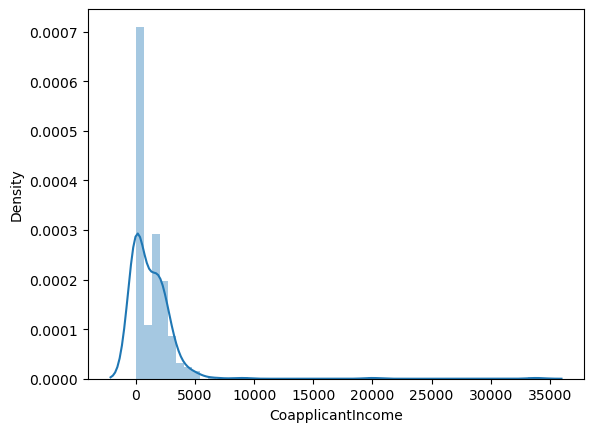

In [41]:
#Funciton Transformation
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [42]:
#It's non-normal distribution
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)
IQR=q3-q1
min=q1-(1.5*IQR)
max=q3+(1.5*IQR)

In [43]:
min,max

(np.float64(-3024.0), np.float64(5040.0))

In [44]:
df=df[df['CoapplicantIncome']<=max]

In [45]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score,ApplicantIncome_ss,ApplicantIncome_min_max
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.098566,0.707469,0.464043
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.545653,-0.408932,0.298336
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.461687,-0.703019,0.254684
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.545653,1.706799,0.612373
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0.101983,-0.879330,0.228515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,-0.545653,1.497342,0.581283
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,0.287389,-0.245316,0.322621
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.545653,-0.479457,0.287868
379,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.545653,0.371067,0.414111


C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\3940875169.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


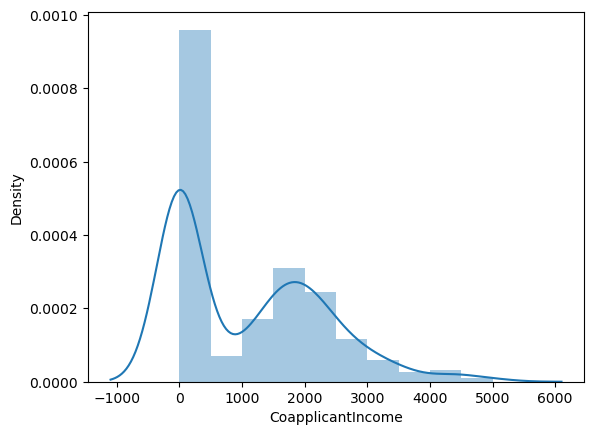

In [46]:
#Funciton Transformation
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [47]:
import numpy as np

In [48]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p) #log1p if we have 0 in data it will impact result
ft.fit(df[['CoapplicantIncome']])
df['CoapplicantIncome_tf']=ft.transform(df[['CoapplicantIncome']])

C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\3384566653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CoapplicantIncome_tf']=ft.transform(df[['CoapplicantIncome']])


C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\2911709949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
C:\Users\a864911\AppData\Local\Temp\ipykernel_16548\2911709949.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome_tf'])


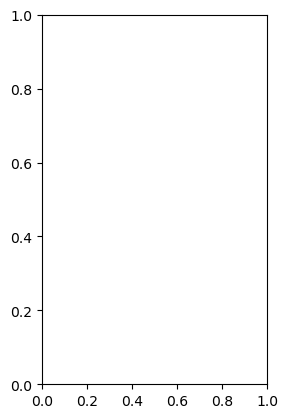

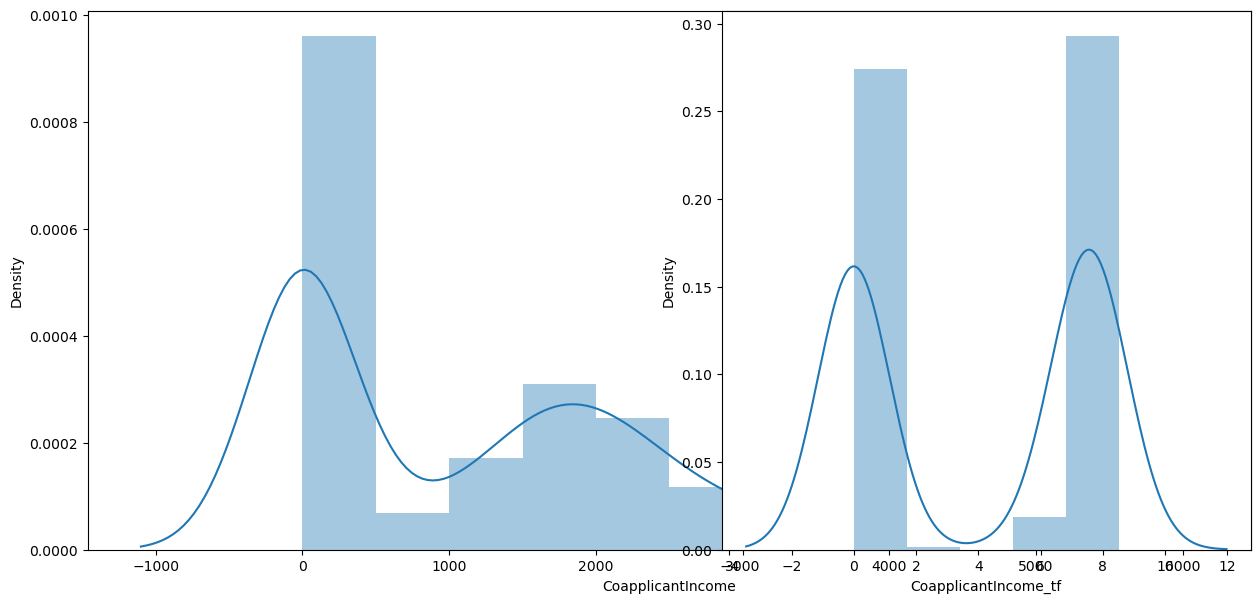

In [49]:
plt.subplot(1,2,1)
plt.figure(figsize=(15,7))
sns.distplot(df['CoapplicantIncome'])

plt.subplot(1,2,2)
sns.distplot(df['CoapplicantIncome_tf'])
plt.show()


In [50]:
#Feature selection
diet_df=pd.read_csv(r'C:\DataScience-GenerativeAI-AgenticAI\Practical\DS-GenAi-AgenticAI-Bootcamp\6-month-AI-Roadmap_2025\6. Shared\diabetes.csv')
diet_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
#Forward eliminatation
x=diet_df.iloc[:,:-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [52]:
y=diet_df.iloc[:,-1:]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [53]:
#classificatoin algorithm
from sklearn.linear_model import LogisticRegression
ls=LogisticRegression()
ls.fit(x,y)

c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [55]:
#to perform forward/backword eliminatation
from mlxtend.feature_selection import SequentialFeatureSelector
fs=SequentialFeatureSelector(ls,k_features=8,forward=True)
fs.fit(x,y)

c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(8, 8),
                          scoring='accuracy')

In [56]:
fs.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [57]:
fs.k_feature_names_

('Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age')

In [58]:
fs.k_score_

np.float64(0.7695696460402341)

In [59]:
#with 8 feature we get 76 accuracy - Now change parameter
fs=SequentialFeatureSelector(ls,k_features=6,forward=True)
fs.fit(x,y)
fs.k_score_

c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d

np.float64(0.7747899159663865)

In [60]:
fs=SequentialFeatureSelector(ls,k_features=6,forward=True)
fs.fit(x,y)
fs.k_score_

c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d

np.float64(0.7747899159663865)

In [61]:
fs=SequentialFeatureSelector(ls,k_features=5,forward=True)
fs.fit(x,y)
fs.k_score_

c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d

np.float64(0.7708768355827178)

In [62]:
fs=SequentialFeatureSelector(ls,k_features=5,forward=True)
fs.fit(x,y)
fs.k_score_

c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d

np.float64(0.7708768355827178)

In [63]:
fs.k_feature_names_

('Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age')

In [64]:
#Train/Split 
df_stud=pd.read_csv(r'C:\DataScience-GenerativeAI-AgenticAI\Practical\DS-GenAi-AgenticAI-Bootcamp\6-month-AI-Roadmap_2025\6. Shared\placement.csv')


In [65]:
#Simple Linear Regression
df_stud.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [66]:
x=df_stud[['cgpa']]
y=df_stud['package']
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

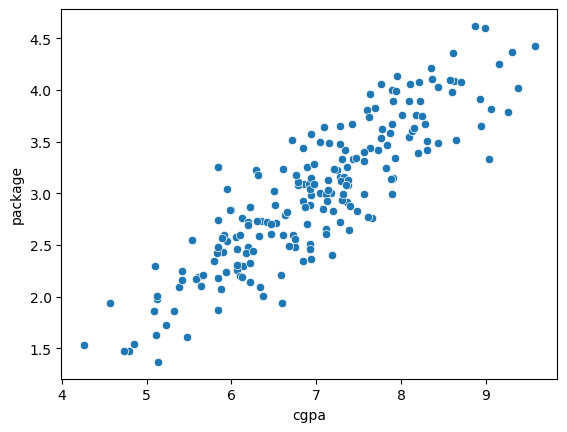

In [67]:
sns.scatterplot(data=df_stud,x="cgpa",y="package")
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [69]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [70]:
lr.predict([[6.89]])

c:\Users\a864911\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.93442685])

In [71]:
lr.score(X_test,Y_test)*100

73.09298089286887

In [72]:
lr.coef_

array([0.56314246])

In [73]:
y_pred=lr.predict(x)
y_pred

array([2.93442685, 1.9376647 , 3.45814934, 3.23289236, 2.96258398,
       3.49756931, 2.84432406, 2.85558691, 2.48391289, 3.73408914,
       2.05029319, 2.77674696, 4.08886889, 2.95695255, 3.40746652,
       3.13715814, 2.90626973, 2.08408174, 2.96258398, 3.2666809 ,
       3.15405241, 2.91190115, 2.51207001, 2.54022713, 2.73169557,
       3.15405241, 3.73408914, 2.10660744, 2.39944152, 3.08084389,
       3.19910381, 3.61582923, 2.97384682, 2.63032992, 3.18784096,
       2.923164  , 2.42759864, 2.37691582, 3.90866331, 3.23852378,
       4.33665157, 2.93442685, 2.40507294, 3.36804655, 1.92077043,
       3.48630646, 2.47265004, 2.34312727, 3.91429473, 4.04944892,
       4.44928007, 4.26907448, 3.76787769, 2.69790702, 2.91753258,
       3.67214347, 2.34312727, 2.77111554, 2.95132113, 3.3117323 ,
       2.21360451, 2.14039599, 2.6246985 , 4.21276023, 3.19910381,
       3.334258  , 1.93203328, 2.72043272, 3.3117323 , 3.16531526,
       2.31497015, 3.26104948, 3.43562364, 3.80729766, 2.91190

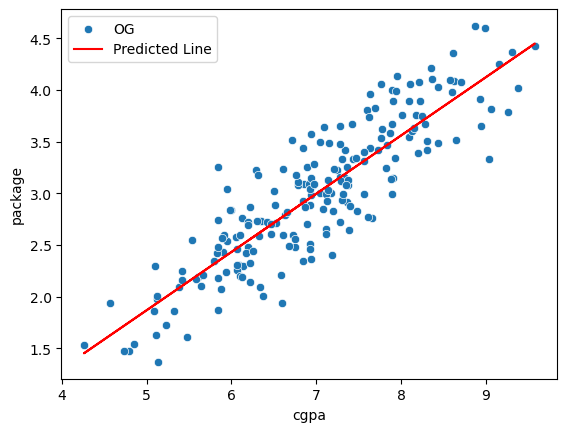

In [74]:
sns.scatterplot(data=df_stud,x="cgpa",y="package")
plt.plot(df_stud['cgpa'],lr.predict(df_stud[['cgpa']]),color='red')
plt.xlabel='CGPA'
plt.legend(["OG","Predicted Line"])
plt.show()

In [75]:
df_icecream=pd.read_csv(r'C:\DataScience-GenerativeAI-AgenticAI\Practical\DS-GenAi-AgenticAI-Bootcamp\6-month-AI-Roadmap_2025\6. Shared\Ice_cream selling data.csv')


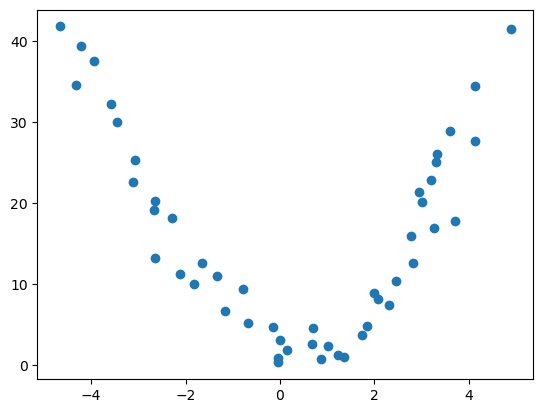

In [76]:
plt.scatter(df_icecream['temp'],df_icecream['icecream'])
plt.show()

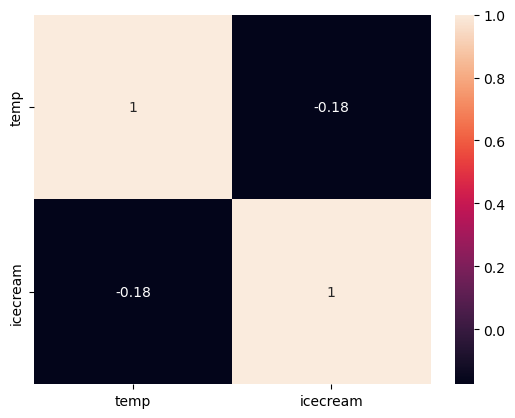

In [77]:
sns.heatmap(data=df_icecream.corr(),annot=True)
plt.show()

In [78]:
x=df_icecream[['temp']]
y=df_icecream['icecream']

In [79]:
#Convert polynomical Nature
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x=pf.fit_transform(x)


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [82]:
lr.score(X_test,Y_test)

0.8430551373706657

In [83]:
pred=lr.predict(x)

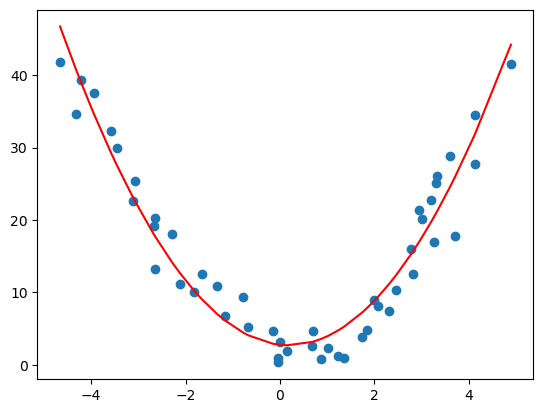

In [84]:
plt.scatter(df_icecream['temp'],df_icecream['icecream'])
plt.plot(df_icecream['temp'],pred,color='red')
plt.show()

In [ ]:
#Reguralazitation
